In [2]:
#import important libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

In [3]:
#import the dataset that contains the shapefile
geo_nigeria = gpd.read_file("C:/Users/Co/Desktop/python analysis/Geopandas/NIR-level_1.shp")

In [4]:
geo_nigeria.head()

,AREA,PERIMETER,ID,CAPTION,geometry
0,None,0.0,Abia,Abia,"POLYGON ((7.69000 5.50000, 7.69000 5.47000, 7...."
1,None,0.0,Adamawa,Adamawa,"POLYGON ((13.07089 9.51345, 13.05967 9.50948, ..."
2,None,0.0,Akwa Ibom,Akwa Ibom,"POLYGON ((7.51000 5.10000, 7.52000 5.13000, 7...."
3,None,0.0,Akwa Ibom,None,"POLYGON ((8.32920 4.63829, 8.33237 4.63988, 8...."
4,None,0.0,Akwa Ibom,None,"POLYGON ((8.30031 4.79591, 8.29549 4.79727, 8...."


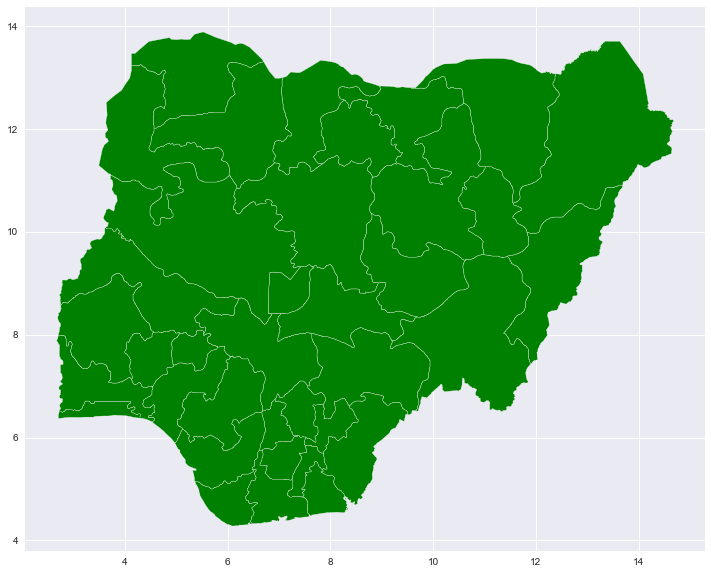

In [5]:
# we use the plot function to ascetain the if the dataset is a geodataframe
ax = geo_nigeria.plot(figsize=(20,10), color='green', edgecolor='white')

In [6]:
#we set the column with states as the new index
geo_nigeria.set_index('CAPTION', inplace=True)

In [7]:
geo_nigeria.head()

,AREA,PERIMETER,ID,geometry
CAPTION,,,,
Abia,None,0.0,Abia,"POLYGON ((7.69000 5.50000, 7.69000 5.47000, 7...."
Adamawa,None,0.0,Adamawa,"POLYGON ((13.07089 9.51345, 13.05967 9.50948, ..."
Akwa Ibom,None,0.0,Akwa Ibom,"POLYGON ((7.51000 5.10000, 7.52000 5.13000, 7...."
NaN,None,0.0,Akwa Ibom,"POLYGON ((8.32920 4.63829, 8.33237 4.63988, 8...."
NaN,None,0.0,Akwa Ibom,"POLYGON ((8.30031 4.79591, 8.29549 4.79727, 8...."


In [8]:
# Loading the csv file of June Covid19 cases to join the geodataframe
n_nigeria = pd.read_csv("C:/Users/Co/Desktop/python analysis/Geopandas/new_nigeria.csv")

In [9]:
n_nigeria.head()

,States with Covid Cases,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,...,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020
0,Lagos,192.0,142.0,163.0,102.0,121.0,66.0,38.0,128.0,170.0,...,169.0,288.0,209.0,250.0,159.0,259.0,285.0,118.0,166.0,200.0
1,Federal Capital Territory -Abuja,14.0,13.0,76.0,29.0,70.0,50.0,NaN,34.0,26.0,...,18.0,16.0,22.0,17.0,34.0,20.0,60.0,56.0,26.0,52.0
2,Kano,4.0,12.0,NaN,10.0,5.0,12.0,2.0,5.0,16.0,...,6.0,NaN,NaN,1.0,NaN,NaN,4.0,5.0,11.0,5.0
3,Edo,41.0,11.0,5.0,10.0,13.0,23.0,14.0,28.0,33.0,...,5.0,13.0,NaN,20.0,NaN,22.0,60.0,29.0,24.0,119.0
4,Rivers,33.0,9.0,21.0,21.0,18.0,24.0,NaN,32.0,30.0,...,8.0,56.0,NaN,NaN,6.0,46.0,68.0,6.0,NaN,NaN


In [10]:
#check for columns with date only excluding the first column
covid_dates = n_nigeria.iloc[:, 1:]

In [11]:
#Check for null cases which shows some states recording zero cases 
covid_dates.isnull().sum()

6/1/2020     16
6/2/2020     21
6/3/2020     20
6/4/2020     16
6/5/2020     22
6/6/2020     13
6/7/2020     19
6/8/2020     22
6/9/2020     10
6/10/2020    21
6/11/2020    19
6/12/2020    14
6/13/2020    12
6/14/2020    17
6/15/2020    16
6/16/2020    20
6/17/2020    18
6/18/2020    15
6/19/2020    14
6/20/2020    22
6/21/2020    17
6/22/2020    15
6/23/2020    22
6/24/2020    15
6/25/2020    15
6/26/2020    17
6/27/2020    14
6/28/2020    18
6/29/2020    16
6/30/2020    17
dtype: int64

In [12]:
zero_case = covid_dates.isnull().sum()

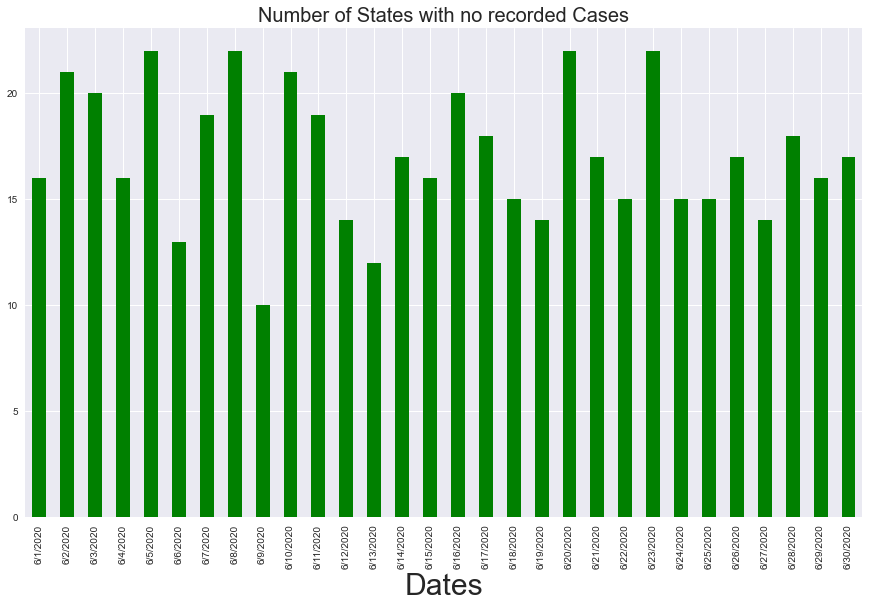

Highest number of states with no reported cases: 22
Lowest number of states with no reported cases: 10


In [13]:
plt.figure(figsize = (15,9))
zero_case.plot(kind='bar', color='green')

plt.title('Number of States with no recorded Cases', fontdict={'fontsize':20})
plt.xlabel('Dates', fontdict={'fontsize':30})
plt.show()

print('Highest number of states with no reported cases:', zero_case.max())
print('Lowest number of states with no reported cases:', zero_case.min())

In [14]:
# Replace null values with zero since it represent no reported cases
n_nigeria = n_nigeria.fillna(0)

In [15]:
n_nigeria.head()

,States with Covid Cases,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,...,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020
0,Lagos,192.0,142.0,163.0,102.0,121.0,66.0,38.0,128.0,170.0,...,169.0,288.0,209.0,250.0,159.0,259.0,285.0,118.0,166.0,200.0
1,Federal Capital Territory -Abuja,14.0,13.0,76.0,29.0,70.0,50.0,0.0,34.0,26.0,...,18.0,16.0,22.0,17.0,34.0,20.0,60.0,56.0,26.0,52.0
2,Kano,4.0,12.0,0.0,10.0,5.0,12.0,2.0,5.0,16.0,...,6.0,0.0,0.0,1.0,0.0,0.0,4.0,5.0,11.0,5.0
3,Edo,41.0,11.0,5.0,10.0,13.0,23.0,14.0,28.0,33.0,...,5.0,13.0,0.0,20.0,0.0,22.0,60.0,29.0,24.0,119.0
4,Rivers,33.0,9.0,21.0,21.0,18.0,24.0,0.0,32.0,30.0,...,8.0,56.0,0.0,0.0,6.0,46.0,68.0,6.0,0.0,0.0


In [16]:
#Change all float values to integer
n_nigeria.iloc[:, 1:] = n_nigeria.iloc[:, 1:].astype(int)

In [17]:
n_nigeria.head()

,States with Covid Cases,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,...,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020
0,Lagos,192,142,163,102,121,66,38,128,170,...,169,288,209,250,159,259,285,118,166,200
1,Federal Capital Territory -Abuja,14,13,76,29,70,50,0,34,26,...,18,16,22,17,34,20,60,56,26,52
2,Kano,4,12,0,10,5,12,2,5,16,...,6,0,0,1,0,0,4,5,11,5
3,Edo,41,11,5,10,13,23,14,28,33,...,5,13,0,20,0,22,60,29,24,119
4,Rivers,33,9,21,21,18,24,0,32,30,...,8,56,0,0,6,46,68,6,0,0


In [18]:
#sum the total reported cases of Covid-19 per states
n_nigeria['Total'] = n_nigeria.iloc[:, 1:].sum(axis=1)
n_nigeria['Total']

0     5567
1     1170
2      250
3      759
4      850
5      494
6      129
7      143
8      221
9     1088
10     193
11     300
12     842
13      46
14     180
15     266
16      52
17     262
18     527
19      76
20      55
21     103
22     275
23      23
24      14
25     104
26     398
27      62
28     342
29      42
30      40
31     240
32     184
33       7
34      41
35       1
Name: Total, dtype: int64

In [19]:
#Sort the values with the highest total cases in descending arrangement
n_nigeria.sort_values(by='Total', ascending=False, inplace=True)

In [20]:
n_nigeria

,States with Covid Cases,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,...,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,Total
0,Lagos,192,142,163,102,121,66,38,128,170,...,288,209,250,159,259,285,118,166,200,5567
1,Federal Capital Territory -Abuja,14,13,76,29,70,50,0,34,26,...,16,22,17,34,20,60,56,26,52,1170
9,Oyo,10,15,0,1,16,31,0,22,11,...,76,67,100,33,76,41,1,66,8,1088
4,Rivers,33,9,21,21,18,24,0,32,30,...,56,0,0,6,46,68,6,0,0,850
12,Delta,5,10,8,10,0,32,0,7,20,...,31,37,0,106,66,47,84,53,0,842
3,Edo,41,11,5,10,13,23,14,28,33,...,13,0,20,0,22,60,29,24,119,759
18,Ogun,2,0,2,34,13,7,19,8,108,...,17,36,22,12,23,18,8,25,19,527
5,Kaduna,30,9,0,23,15,2,6,20,6,...,20,8,27,33,16,19,0,11,52,494
26,Ebonyi,0,23,0,17,0,23,0,0,49,...,30,0,0,0,21,42,68,43,0,398
28,Gombe,0,3,5,1,14,17,16,13,16,...,28,0,3,0,5,5,0,11,0,342


In [21]:
n_nigeria.groupby('States with Covid Cases')['Total'].sum()

States with Covid Cases
Abia                                 300
Adamawa                               46
Akwa Ibom                             41
Anambra                               62
Bauchi                               262
Bayelsa                              184
Benue                                 52
Borno                                221
Delta                                842
Ebonyi                               398
Edo                                  759
Ekiti                                 23
Enugu                                240
Federal Capital Territory -Abuja    1170
Gombe                                342
Imo                                  180
Imo                                  104
Jigawa                                55
Kaduna                               494
Kano                                 250
Katsina                              193
Kebbi                                 42
Kogi                                  14
Kwara                            

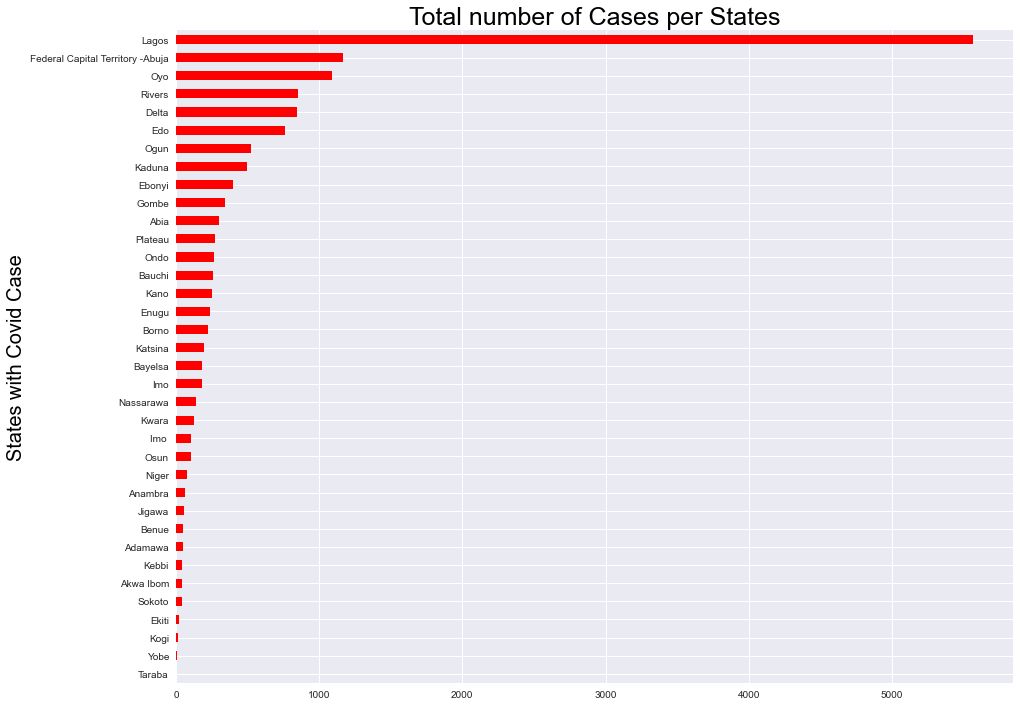

Highest number occured in Lagos with 5567
Highest number occured in Taraba with 1


In [22]:
plt.figure(figsize = (15,12))
total_case = n_nigeria.groupby('States with Covid Cases')['Total'].sum().sort_values()
total_case.plot(kind='barh', color='red')

plt.ylabel('States with Covid Case', fontdict={'fontsize':20, 'color':'black'})
plt.title('Total number of Cases per States', fontdict={'fontsize':25, 'color':'black'})

plt.show()

print('Highest number occured in Lagos with', n_nigeria['Total'].max())
print('Highest number occured in Taraba with', n_nigeria['Total'].min() )

In [23]:
#Set the column 'States with Covid Cases' as new index in order to join with the geodataframe
n_nigeria.set_index('States with Covid Cases', inplace=True)

In [24]:
#combine the geodataframe with the wrangled csv file

combined = geo_nigeria.join(n_nigeria)

In [25]:
combined.head(4)

,AREA,PERIMETER,ID,geometry,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,...,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,Total
Abia,None,0.0,Abia,"POLYGON ((7.69000 5.50000, 7.69000 5.47000, 7....",5.0,0.0,0.0,0.0,0.0,1.0,...,10.0,20.0,28.0,8.0,9.0,5.0,0.0,0.0,8.0,300.0
Adamawa,None,0.0,Adamawa,"POLYGON ((13.07089 9.51345, 13.05967 9.50948, ...",4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,15.0,0.0,0.0,11.0,0.0,0.0,46.0
Akwa Ibom,None,0.0,Akwa Ibom,"POLYGON ((7.51000 5.10000, 7.52000 5.13000, 7....",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0,41.0
Anambra,None,0.0,Anambra,"POLYGON ((7.12000 5.92000, 7.09000 5.93000, 7....",0.0,0.0,1.0,0.0,0.0,17.0,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,0.0,62.0


In [26]:
combined.tail()

,AREA,PERIMETER,ID,geometry,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,...,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,Total
Yobe,None,0.0,Yobe,"POLYGON ((10.82000 11.87000, 10.82000 11.88000...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0
Zamfara,None,0.0,Zamfara,"POLYGON ((6.89000 11.32000, 6.88000 11.32000, ...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,None,0.0,Akwa Ibom,"POLYGON ((8.32920 4.63829, 8.33237 4.63988, 8....",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,None,0.0,Akwa Ibom,"POLYGON ((8.30031 4.79591, 8.29549 4.79727, 8....",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,None,0.0,Rivers,"POLYGON ((5.74573 4.48826, 5.74092 4.49012, 5....",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Remove null index values
combined = combined.iloc[:37,:]

combined

,AREA,PERIMETER,ID,geometry,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,...,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,Total
Abia,None,0.0,Abia,"POLYGON ((7.69000 5.50000, 7.69000 5.47000, 7....",5.0,0.0,0.0,0.0,0.0,1.0,...,10.0,20.0,28.0,8.0,9.0,5.0,0.0,0.0,8.0,300.0
Adamawa,None,0.0,Adamawa,"POLYGON ((13.07089 9.51345, 13.05967 9.50948, ...",4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,15.0,0.0,0.0,11.0,0.0,0.0,46.0
Akwa Ibom,None,0.0,Akwa Ibom,"POLYGON ((7.51000 5.10000, 7.52000 5.13000, 7....",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0,41.0
Anambra,None,0.0,Anambra,"POLYGON ((7.12000 5.92000, 7.09000 5.93000, 7....",0.0,0.0,1.0,0.0,0.0,17.0,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,0.0,62.0
Bauchi,None,0.0,Bauchi,"POLYGON ((9.90000 9.79000, 9.89000 9.79000, 9....",2.0,1.0,5.0,10.0,25.0,5.0,...,3.0,15.0,6.0,5.0,4.0,0.0,0.0,0.0,3.0,262.0
Bayelsa,None,0.0,Bayelsa,"POLYGON ((5.83420 4.42000, 5.82577 4.42803, 5....",0.0,0.0,0.0,9.0,0.0,0.0,...,8.0,0.0,7.0,0.0,0.0,0.0,1.0,13.0,7.0,184.0
Benue,None,0.0,Benue,"POLYGON ((8.21000 6.75000, 8.20000 6.75000, 8....",2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,52.0
Borno,None,0.0,Borno,"POLYGON ((12.64000 10.41000, 12.63000 10.40000...",17.0,8.0,0.0,26.0,0.0,26.0,...,8.0,1.0,0.0,0.0,0.0,8.0,0.0,5.0,2.0,221.0
Cross River,None,0.0,Cross River,"POLYGON ((7.90000 5.76000, 7.90000 5.77000, 7....",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta,None,0.0,Delta,"POLYGON ((6.56000 6.49000, 6.57000 6.49000, 6....",5.0,10.0,8.0,10.0,0.0,32.0,...,31.0,37.0,0.0,106.0,66.0,47.0,84.0,53.0,0.0,842.0


In [28]:
# Replace null values with 0, which signifies 0 cases reported
combined.fillna(0, inplace=True)

In [29]:
combined

,AREA,PERIMETER,ID,geometry,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,...,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,Total
Abia,0,0.0,Abia,"POLYGON ((7.69000 5.50000, 7.69000 5.47000, 7....",5.0,0.0,0.0,0.0,0.0,1.0,...,10.0,20.0,28.0,8.0,9.0,5.0,0.0,0.0,8.0,300.0
Adamawa,0,0.0,Adamawa,"POLYGON ((13.07089 9.51345, 13.05967 9.50948, ...",4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,15.0,0.0,0.0,11.0,0.0,0.0,46.0
Akwa Ibom,0,0.0,Akwa Ibom,"POLYGON ((7.51000 5.10000, 7.52000 5.13000, 7....",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0,41.0
Anambra,0,0.0,Anambra,"POLYGON ((7.12000 5.92000, 7.09000 5.93000, 7....",0.0,0.0,1.0,0.0,0.0,17.0,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,0.0,62.0
Bauchi,0,0.0,Bauchi,"POLYGON ((9.90000 9.79000, 9.89000 9.79000, 9....",2.0,1.0,5.0,10.0,25.0,5.0,...,3.0,15.0,6.0,5.0,4.0,0.0,0.0,0.0,3.0,262.0
Bayelsa,0,0.0,Bayelsa,"POLYGON ((5.83420 4.42000, 5.82577 4.42803, 5....",0.0,0.0,0.0,9.0,0.0,0.0,...,8.0,0.0,7.0,0.0,0.0,0.0,1.0,13.0,7.0,184.0
Benue,0,0.0,Benue,"POLYGON ((8.21000 6.75000, 8.20000 6.75000, 8....",2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,52.0
Borno,0,0.0,Borno,"POLYGON ((12.64000 10.41000, 12.63000 10.40000...",17.0,8.0,0.0,26.0,0.0,26.0,...,8.0,1.0,0.0,0.0,0.0,8.0,0.0,5.0,2.0,221.0
Cross River,0,0.0,Cross River,"POLYGON ((7.90000 5.76000, 7.90000 5.77000, 7....",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Delta,0,0.0,Delta,"POLYGON ((6.56000 6.49000, 6.57000 6.49000, 6....",5.0,10.0,8.0,10.0,0.0,32.0,...,31.0,37.0,0.0,106.0,66.0,47.0,84.0,53.0,0.0,842.0


In [30]:
#Convert float values in date columns to integers
combined.iloc[:,4:] = combined.iloc[:,4:].astype(int)

In [31]:
combined

,AREA,PERIMETER,ID,geometry,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,...,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,Total
Abia,0,0.0,Abia,"POLYGON ((7.69000 5.50000, 7.69000 5.47000, 7....",5,0,0,0,0,1,...,10,20,28,8,9,5,0,0,8,300
Adamawa,0,0.0,Adamawa,"POLYGON ((13.07089 9.51345, 13.05967 9.50948, ...",4,0,0,0,0,0,...,0,0,13,15,0,0,11,0,0,46
Akwa Ibom,0,0.0,Akwa Ibom,"POLYGON ((7.51000 5.10000, 7.52000 5.13000, 7....",0,0,0,0,0,0,...,0,0,18,0,0,0,3,0,0,41
Anambra,0,0.0,Anambra,"POLYGON ((7.12000 5.92000, 7.09000 5.93000, 7....",0,0,1,0,0,17,...,0,0,4,0,1,0,0,2,0,62
Bauchi,0,0.0,Bauchi,"POLYGON ((9.90000 9.79000, 9.89000 9.79000, 9....",2,1,5,10,25,5,...,3,15,6,5,4,0,0,0,3,262
Bayelsa,0,0.0,Bayelsa,"POLYGON ((5.83420 4.42000, 5.82577 4.42803, 5....",0,0,0,9,0,0,...,8,0,7,0,0,0,1,13,7,184
Benue,0,0.0,Benue,"POLYGON ((8.21000 6.75000, 8.20000 6.75000, 8....",2,0,4,0,0,0,...,0,3,0,0,0,0,0,12,0,52
Borno,0,0.0,Borno,"POLYGON ((12.64000 10.41000, 12.63000 10.40000...",17,8,0,26,0,26,...,8,1,0,0,0,8,0,5,2,221
Cross River,0,0.0,Cross River,"POLYGON ((7.90000 5.76000, 7.90000 5.77000, 7....",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Delta,0,0.0,Delta,"POLYGON ((6.56000 6.49000, 6.57000 6.49000, 6....",5,10,8,10,0,32,...,31,37,0,106,66,47,84,53,0,842


In [32]:
#Checking the Total values in the new dataframe
combined["Total"]

Abia                                 300
Adamawa                               46
Akwa Ibom                             41
Anambra                               62
Bauchi                               262
Bayelsa                              184
Benue                                 52
Borno                                221
Cross River                            0
Delta                                842
Ebonyi                               398
Edo                                  759
Ekiti                                 23
Enugu                                240
Federal Capital Territory -Abuja    1170
Gombe                                342
Imo                                  180
Jigawa                                55
Kaduna                               494
Kano                                 250
Katsina                              193
Kebbi                                 42
Kogi                                  14
Kwara                                129
Lagos           

### Plotting the Geodata Info

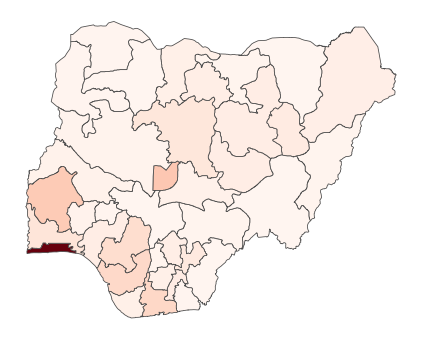

In [33]:
# Set the 'Total' column as the variable to be visualized on the map

#set the chloropeth range to be
vmin, vmax = 120, 220

#set matplotlib figures and sizes
fig, ax = plt.subplots(1, figsize=(10,6))

#create map
combined.plot(column='Total', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.3')

#remove the axis
ax.axis('off')

plt.show()

### Add Title and Annotation to the Map

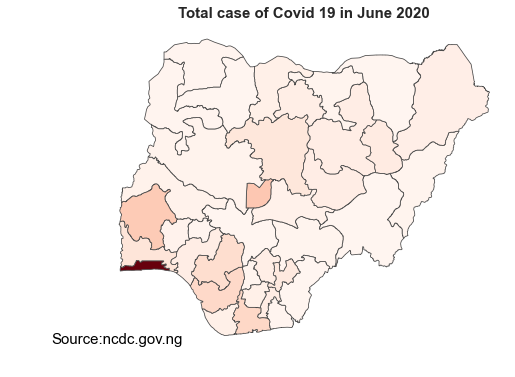

In [34]:
# we set the 'Total' column as the variable to be visualized on the map
#set the chloropeth range to be

#vmin, vmax = 120, 220

#set matplotlib figures and sizes

fig, ax = plt.subplots(1, figsize=(10,6))

#create map

combined.plot(column='Total', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.3')

#set the title
ax.set_title('Total case of Covid 19 in June 2020', fontdict={'fontsize':'15', 'fontweight':'bold'})

#set the annotation
ax.annotate('Source:ncdc.gov.ng', xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='black')

#remove the axis
ax.axis('off')

plt.show()

### Add A Colorbar

In [35]:
#create a colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

#empty array for the data range

sm._A = []

cbar=fig.colorbar(sm)

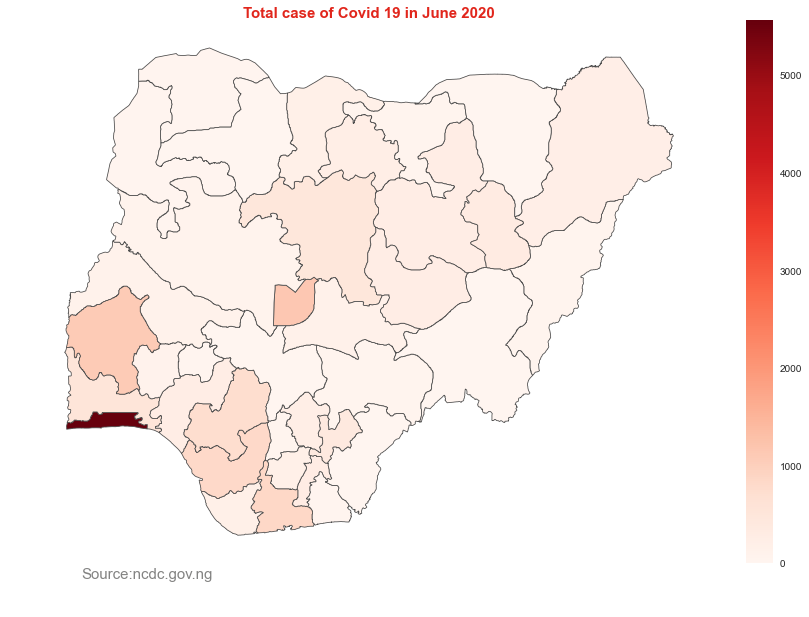

In [36]:
#set matplotlib figures and sizes
fig, ax = plt.subplots(1, figsize=(15,10))

#create map
combined.plot(column='Total', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.3', legend=True)

#set the title
ax.set_title('Total case of Covid 19 in June 2020', fontdict={'fontsize':'15', 'fontweight':'bold', 'color':'#e1261c'})

#create an annotation
ax.annotate('Source:ncdc.gov.ng', xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=15, color='#838382')


#remove the axis
ax.axis('off')

plt.show()

fig.savefig('June Total Case.png', dpi=300)